# K-Means: Limitations

In this notebook we study the limitations of the K-Means clustering algorithm.


We give at least **three limitations** of K-Means.

- Limitation 1: K-means requires us to specify the number of clusters a priory.

- Limitation 2: K-Means is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.

- Limitation 3: K-Means forms spherical clusters only. It fails when data is not spherical (e.g., elliptical) or of arbitrary shape.

Previously we discussed how to address the first limitation, i.e., how to find the optimal number of clusters.

In this notebook we demonstrate the third limitation, i.e., K-means fails to cluster non-spherical data.

We consider two types of data distrubution for this demonstration:
- Ellitical Shape Data
- Arbitrary Shape data

In this notebook, we use **arbitrary** shape data.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.cluster import KMeans


# Synthetic Dataset

We will use Scikit-Learn's "datasets.make_moons" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models.

Following parameter is used by the make_moons function:

- noise : Standard deviation of Gaussian noise added to the data.

Using the make_moons function we will create **two clusters** of points.

## Create Arbitrary Shape Clusters and Visualiize

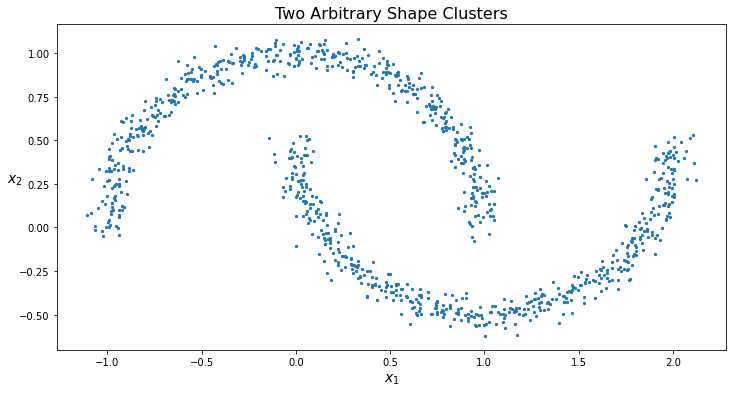

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=5, cmap='autumn')
plt.title("Two Arbitrary Shape Clusters", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

# K-Means

We will apply the K-Means algorithm to identify **two** distinct clusters. 

We set the value of k to 2.

In [3]:
# Number of clusters
k = 2

# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1, n_jobs=-1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 766.5972350707409
Iteration 1, inertia 405.97897953594753
Iteration 2, inertia 404.39738768101506
Iteration 3, inertia 404.03294349609297
Iteration 4, inertia 403.7789362907491
Iteration 5, inertia 403.7022656316218
Converged at iteration 5: center shift 4.513686124073724e-05 within tolerance 4.995223022533364e-05.
Initialization complete
Iteration 0, inertia 1153.2847284936895
Iteration 1, inertia 415.6939206559981
Iteration 2, inertia 404.23939796080845
Iteration 3, inertia 403.70594480520435
Converged at iteration 3: center shift 2.4933612131191032e-05 within tolerance 4.995223022533364e-05.
Initialization complete
Iteration 0, inertia 760.15270817294
Iteration 1, inertia 462.72726163423295
Iteration 2, inertia 408.0195281575096
Iteration 3, inertia 403.77634522089
Iteration 4, inertia 403.69246992717916
Converged at iteration 4: center shift 2.3249789693762483e-05 within tolerance 4.995223022533364e-05.
Initialization complete
Iteration 

C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1, random_state=42, verbose=1)

## Plotting Decision Boundary 


To better understand how K-Means performs, we need to **<font color=red size=6> visualize the decision boundary </font>**.


Following functions are used to plot the decision boundary. 

In [4]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

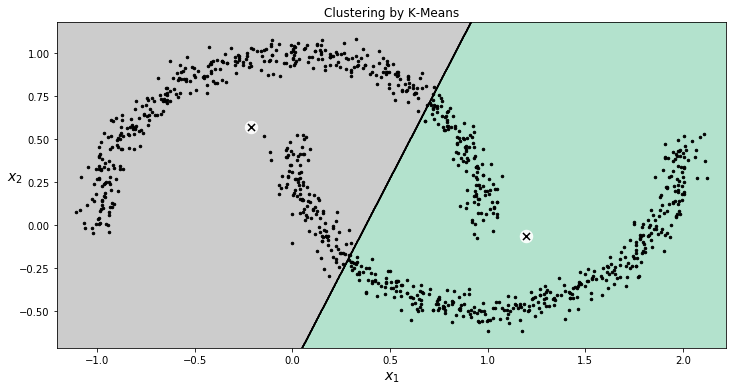

In [5]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

## Observation

We see that although the dataset contains two distinct clusters of arbitrary shape, the K-Means algorithm is unable to identify those.

In a future notebook we will see that the **Density-based spatial clustering of applications with noise (DBSCAN)** clustering method is able to identify clusters of arbitrary shape.

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(X)
np.unique(dbscan.labels_)

array([0, 1], dtype=int64)

In [23]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("Clustering by DBSCAN\neps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

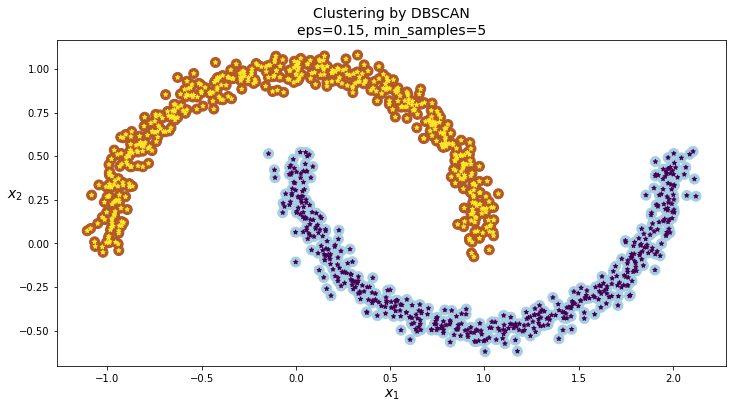

In [24]:
plt.figure(figsize=(12, 6))
plot_dbscan(dbscan, X, size=100)
plt.show()
